# **Task-6 Graduate Rotational Internship Program (GRIP - Feb 2021) organised by The Sparks Foundation.**
### Author: Adya Bajpai   (Intern Feb 2021)
# **Prediction using Decision Tree Algorithm**
* Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

* The goal of using a Decision Tree is to create a training model that can use to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

* In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.
 

### **Que. Create the Decision Tree classifier and visualize it graphically..**
### **Aim:  The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.**

In [1]:
#importing all the required libraries
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the data

In [2]:
ir =pd.read_csv('Iris.csv',index_col=0)
ir.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


Species is our target Variable, all others are feauture. 

In [3]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


We do not have any null Values!

In [4]:
ir.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
ir = ir.rename(columns = {'SepalLengthCm' : 'Sepal Length', 'SepalWidthCm' : 'Sepal Width', 'PetalLengthCm' : 'Petal Length', 'PetalWidthCm' : 'Petal Width'  })

In [6]:
ir.nunique()

Sepal Length    35
Sepal Width     23
Petal Length    43
Petal Width     22
Species          3
dtype: int64

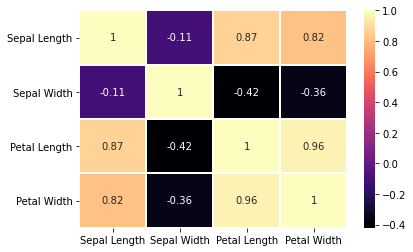

In [7]:
sns.heatmap(ir.corr(), annot=True, linewidth=1, cmap='magma')

1. Petal length is highly related to petal width and Petal Length.
2. Sepal length is not related to sepal width.
3. Negative correlation of Sepal width with Petal length and Petal Width. 

In [8]:
ir.duplicated().sum()

3

In [9]:
ir.drop_duplicates()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


### Splitting the Dataset

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = ir.iloc[:,:-1].values
y = ir.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Data:",X_train.shape)
print("Testing Data:",X_test.shape)

Training Data: (120, 4)
Testing Data: (30, 4)


### Building and Training the Model

In [12]:
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, classification_report


dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
print("Successfully Created the Decision Tree Classifier!")

Successfully Created the Decision Tree Classifier!


### Classification Report and Confusion Matrix

In [13]:
y_pred=dct.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.93      1.00      0.96        13

       accuracy                           0.97        30
      macro avg       0.98      0.95      0.96        30
   weighted avg       0.97      0.97      0.97        30



In [14]:
acc = sm.accuracy_score(y_test,y_pred)
print("The Accuracy is: {0}%".format(acc*100))

The Accuracy is: 96.66666666666667%


In [15]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  6,  1],
       [ 0,  0, 13]], dtype=int64)

## Visualizing the Trained Model

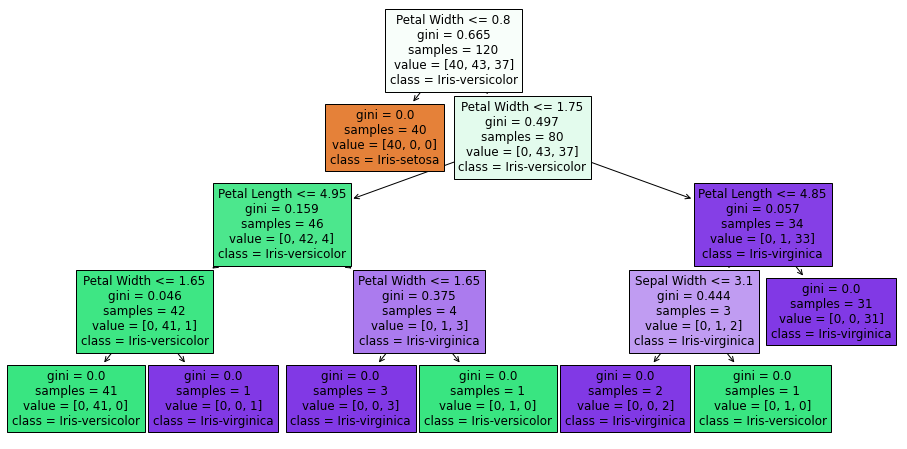

In [16]:
fig = plt.figure(figsize=(16,8))
feature=['Sepal Length','Sepal Width','Petal Length','Petal Width']
class_name =['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_tree(dct, filled = True,class_names=class_name,feature_names=feature);
plt.show()

# Testing for New points except from Dataset

In [17]:
Test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]]

print(dct.predict(Test_point))

['Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica']


# Thankyou!